In [283]:
import numpy as np

num_items = 5
capacidade_mochila = 7
valor_items = [2,2,4,5,3]
pesos_items = [3,1,3,4,2]

def mochila(n,c,vl,ps):
    m = np.zeros((n,c))

    for i in range(n):
        for k in range(c):
            if i != 0 and k != 0:
                if ps[i-1] <= k:
                  m[i][k] = max(vl[i-1] + m[i-1][k-ps[i-1]],m[i-1][k])
                else:
                  m[i][k] = m[i-1][k]
    
    return m

m = mochila(num_items+1,capacidade_mochila+1,valor_items,pesos_items)

print(m)
print(np.max(m))


[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  2.  2.  2.  2.]
 [ 0.  2.  2.  2.  4.  4.  4.  4.]
 [ 0.  2.  2.  4.  6.  6.  6.  8.]
 [ 0.  2.  2.  4.  6.  7.  7.  9.]
 [ 0.  2.  3.  5.  6.  7.  9. 10.]]
10.0


[950.0, 902.5, 857.375, 814.5062499999999, 773.7809374999998, 735.0918906249998, 698.3372960937497, 663.4204312890622, 630.2494097246091, 598.7369392383787, 568.8000922764597, 540.3600876626367, 513.3420832795049, 487.6749791155296, 463.29123015975307, 440.1266686517654, 418.1203352191771, 397.2143184582182, 377.3536025353073, 358.4859224085419, 340.5616262881148, 323.533544973709, 307.35686772502356, 291.98902433877237, 277.38957312183373, 263.52009446574203, 250.3440897424549, 237.82688525533214, 225.93554099256554, 214.63876394293726, 203.9068257457904, 193.71148445850088, 184.02591023557582, 174.82461472379703, 166.08338398760716, 157.7792147882268, 149.89025404881545, 142.39574134637468, 135.27595427905592, 128.5121565651031, 122.08654873684794, 115.98222130000555, 110.18311023500526, 104.673954723255, 99.44025698709224, 94.46824413773763, 89.74483193085074, 85.25759033430819, 80.99471081759278, 76.94497527671314, 73.09772651287747, 69.4428401872336, 65.97069817787191, 62.67216326

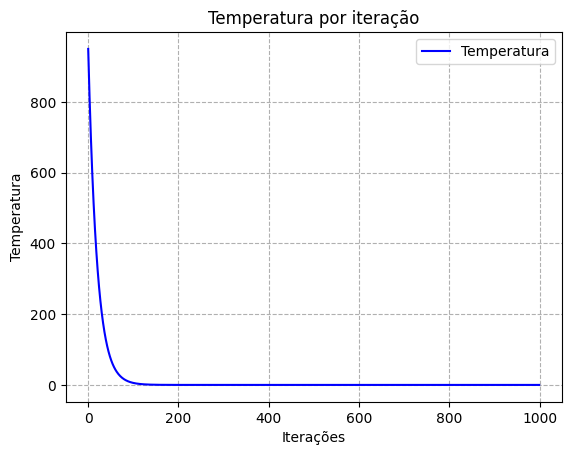

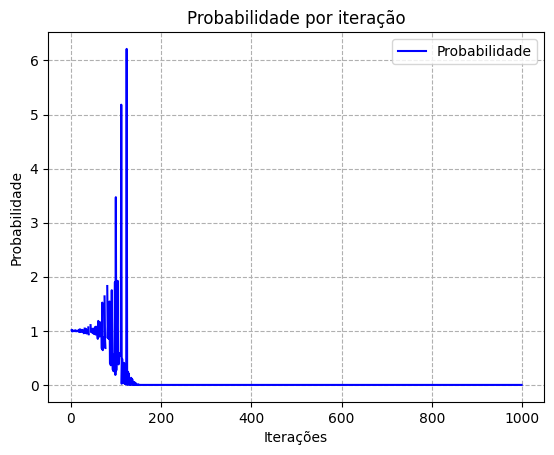

In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# https://www.youtube.com/watch?v=w2rBcPo88XM 
# video do simulated coiso que a stora meteu ate explica bem a cena da temepratua

num_items = 5
capacidade_mochila = 7
valor_items = [2,2,4,5,3]
pesos_items = [3,1,3,4,2]

# ver video
temperatura = 1000
iteracoes = 1000
arrefecer = 0.95
lista_temp = []
lista_prob = []

'''
num_items = 3
capacidade_mochila = 50
valor_items = [60, 100, 120]
pesos_items = [10, 20, 30]'''

# isto calcula o valor e os pesos da escolha de objetos que metes aqui
def calc_valor(solucao):
    valor = 0
    peso = 0
    for i in range(num_items):
        if solucao[i] == 1:
            valor += valor_items[i]
            peso += pesos_items[i]
    if peso > capacidade_mochila:
        return -1
    return valor

# isto faz o simulated coiso, depois explico melhor
def sim_an(num, temp, iter,arr):
    global lista_temp

    solucao_temp = [random.choice([0,1]) for nada in range(num)]
    maximo_temp = calc_valor(solucao_temp)

    maximo = maximo_temp
    solucao = solucao_temp[:]

    for zero in range(iter):
        temp *= arr
        lista_temp.append(temp)
        visinho = solucao_temp[:]
        i = random.randint(0,num-1)
        visinho[i] = 1 - visinho[i]

        visinho_val = calc_valor(visinho)
        prob = math.exp((visinho_val - maximo_temp) / temp)

        if prob == 1:
            lista_prob.append(None)
        else:
            lista_prob.append(prob)

        if visinho_val > maximo_temp or random.random() < prob:
            maximo_temp = visinho_val
            solucao_temp = visinho[:]

            if maximo_temp > maximo:
                maximo = maximo_temp
                solucao = solucao_temp[:]

    return maximo, solucao


maximo, solucao = sim_an(num_items,temperatura,iteracoes,arrefecer)
print(lista_temp)
print(lista_prob)
print(maximo)
print(solucao)

plt.plot(list(range(0,iteracoes)), lista_temp, color='blue', marker='', label='Temperatura')
plt.title('Temperatura por iteração')
plt.xlabel('Iterações')
plt.ylabel('Temperatura')
plt.grid(True, linestyle='--', alpha=1)
plt.legend()

plt.show()

plt.plot(list(range(0,iteracoes)), lista_prob, color='blue', marker='', label='Probabilidade')
plt.title('Probabilidade por iteração')
plt.xlabel('Iterações')
plt.ylabel('Probabilidade')
plt.grid(True, linestyle='--', alpha=1)
plt.legend()